In [1]:
import warnings
warnings.simplefilter('ignore')

import gshap
from gshap import intergroup

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# syntax
# distance = gshap.intergroup.MAD
# g = gshap.intergroup.IntergroupDistance(group, distance)
# explainer = gshap.KernelExplainer(model, X_test, g)
# gshap_values = explainer.gshap_values(X_test, nsamples=100)

/home/dsbowen/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [27]:
# Load COMPAS recidivism dataset and train SVM classifier
X, y = gshap.datasets.load_recidivism()
X_train, X_test, y_train, y_test = train_test_split(X,y)
clf = svm.SVC()
clf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test))
print('Accuracy: {0:.2f}%'.format(100*accuracy))

Accuracy: 67.50%


In [4]:
# Compute G-SHAP values for disparate impact between African-Americans
# and other races
g = gshap.fairness_measures.DisparateImpact(X_test['African-American'])
explainer = gshap.KernelExplainer(clf.predict, X_train, g)
gshap_values = explainer.gshap_values(X_test, nsamples=100)

Total disparate impact: -35.01
Feature impacts sum to total: -39.22


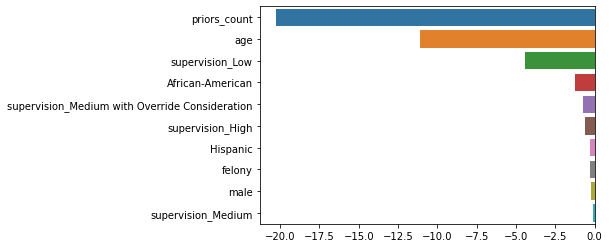

In [43]:
# Print disparate impacts
import seaborn as sns
import pandas as pd

disparate_impact = g(clf.predict(X_test))
print('Total disparate impact: %.2f' % (100*disparate_impact))
print('Feature impacts sum to total: %.2f' % (100*sum(gshap_values)))
values = [(col, 100*val) for col, val in zip(X.columns, gshap_values)]
values.sort(key=lambda x: x[1])
values = values[:10]
cols = [col for col, val in values]
values = [val for col, val in values]
sns.barplot(y=cols, x=values)